**Содержание темы**

1. Теория

2. [Практика 1](https://colab.research.google.com/drive/1dApswu6lfXEWfPl9ZgTspfFIneWGQIOq?usp=sharing)

3. [Практика 2](https://colab.research.google.com/drive/1sLGgmGkPLr5-ZLJM6vNLs7rQH29rbSUZ?usp=sharing)


Привет!

В этом занятии вы рассмотрите новую тему – **«Автокодировщики»**

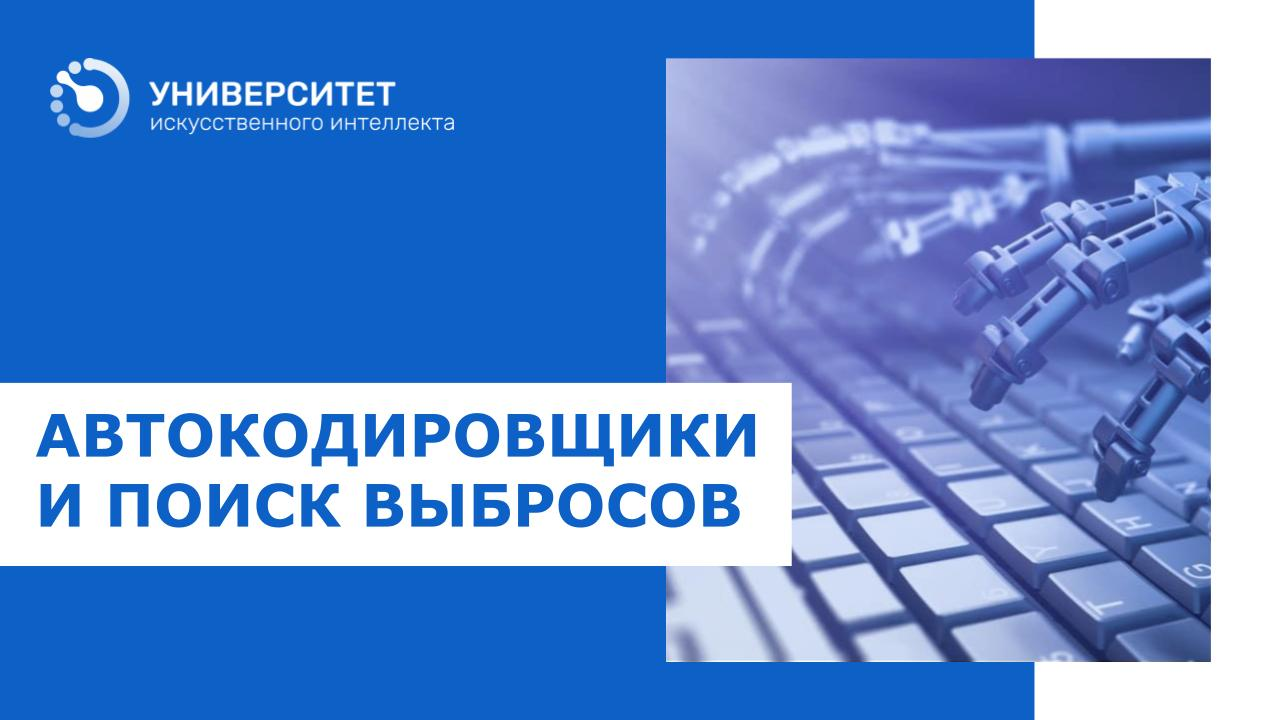

Данная тема открывает вам новую архитектуру НС – **image to image**. Ее в 2006 году предложили Джеффри Хинтон и Руслан Салахутдинов. В ней на вход подают изображение и на выходе она также создает изображение. 

> Сразу стоит отметить, что автокодировщик работает не только с изображениями – данные могут быть любыми, если они выражаемы в цифрах.

 Чтобы углубится в новую тему, вспомните, что вы уже знаете: 
* задачи классификации, когда при подаче изображения/текста в НС на выходе получаете отнесение содержимого к определенному классу. Например, распознавание изображений рукописных цифр MNIST или автора текста;
* задачи регрессии, когда на основании набора данных НС рассчитывает некоторое число. Например, оценка стоимости квартиры или автомобиля по набору параметров и характеристик.


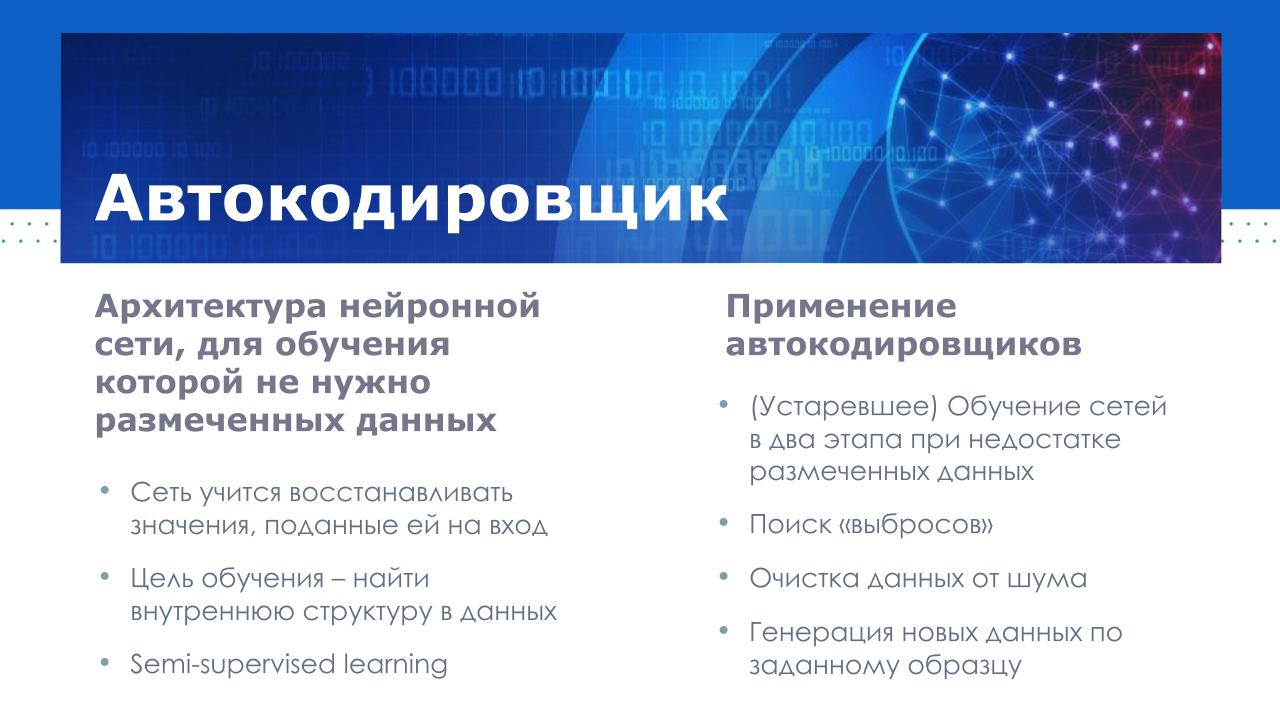

Одно из достоинств данной архитектуры в том, что не нужно размечать данные, поскольку автокодировщики – пример полуобучения с учителем или semi-supervised learning. 

> Строго говоря, размеченные данные есть – автокодировщику нужно давать понять, на сколько правильно он учится. Только для их получения с точки зрения составления датасета нужно приложить на порядок меньше усилий. "Размеченными" данными могут быть, например, зашумленные оригинальные данные или вовсе сами же оригиналы.

Все примеры, что вы изучали до этого, относились к обучению с учителем или supervised learning. То есть у вас есть обучающая выборка и правильные ответы. Вы показываете нейросети изображение и говорите, что это. Например, картинка с цифрой "2" и ответ – "2". НС пытается подстроить свои решения под правильные ответы. Это и есть обучение с учителем.

В случае архитектуры автокодировщика в качестве обучающих примеров выступает картинка из MNIST, и она же – в качестве правильных ответов. По факту у вас есть и обучающая выборка, и правильные ответы, но нет необходимости их размечать.


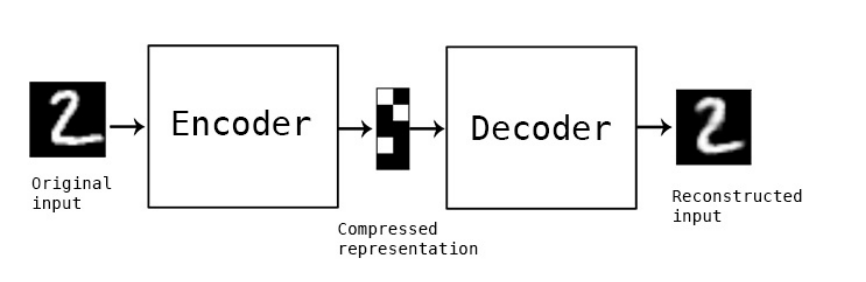

*Автокодировщик часто представляют в двух частях: Encoder и Decoder. Encoder отвечает за выделение важных признаков входного объекта в некоторое скрытое пространство призаков(compressed representation), а Decoder – за восстановление объекта по этим признакам. Буквально через несколько абзацев поговорим об архитектуре подробнее.*

Главный принцип автокодировщика в том, что сеть учится восстанавливать значения, поданные ей на вход. Для этого ей необходимо найти ключевые признаки и выразить их в скрытом пространстве так, чтобы по нима можно было максимально точно восстановить входные данные.

Автокодировщики применяют в следующих случаях:

1. Обучение при недостатке размеченных данных. Несмотря на то, что автокодировщики используют все реже, их структура и архитектура – прародитель и основа для таких современных технологий как генеративные сети, чат-боты, генерация текста, сегментация изображений. 
2. Поиск выбросов данных. Эту тему вы рассмотрите в этом же уроке.
3. Очистка данных. Например, если фотография плохого качества или на ней присутствуют шумы. Автокодировщики могут их убрать.

Условно модель автокодировщика можно разбить на две части: **encoder** (он же *энкодер*, *кодировщик*) и **decoder** (он же *декодер*).

Encoder сворачивает исходный набор данных (X) в некое скрытое пространство (Z), которое зачастую меньшего размера, чем размер входных данных. Однако в некоторых задачах скрытое пространство может быть больше, чем входные данные.<br>
Decoder разворачивает вектор (Z) в выходной набор данных (X').
Обязательное условие в структуре автокодировщика – это равенство в размере данных на входе и на выходе НС. Т.е. в первом и последнем слоях одинаковое количество нейронов.

> **Энкодер** – тот, что кодирует объект в латентное пространство.<br>
**Декодер** – тот, что расшифровывает объект из латентного пространства.


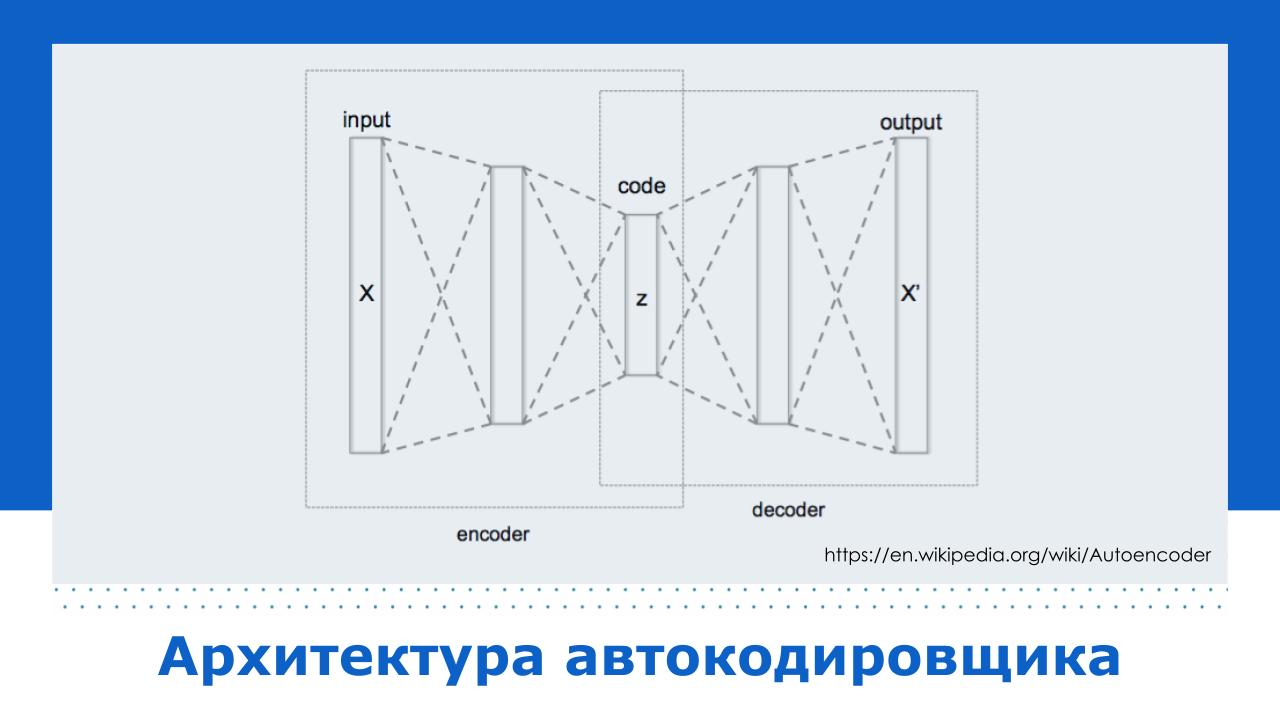

**Преимущества глубины**

Автокодировщики часто обучают с помощью однослойного кодировщика и однослойного декодера. Однако использование глубоких (многоуровневых) кодировщиков и декодеров дает много преимуществ:
* глубина автокодировщиков позволяет восстанавливать более сложные зависимости в данных при том же уровне (или даже меньшем) переобучения;
* глубина может уменьшить количество обучающих данных, необходимых для изучения некоторых функций;
* экспериментально глубокие автокодировщики дают лучшее сжатие по сравнению с мелкими или линейными.

**Сравнение с алгоритмом сжатия**

Автокодировщики можно сравнить с общеизвесными алгоритмами сжатия типа ZIP. 
> Если точнее, ZIP - это формат данных. А самый популярный алгоритм для сжатия данных в этот формат называется **Deflate**.

Если с автокодировщиками вы ранее не сталкивались, но имели дело со сжатием данных, то их сравнение поможет лучше понять сегодняшнюю тему. 



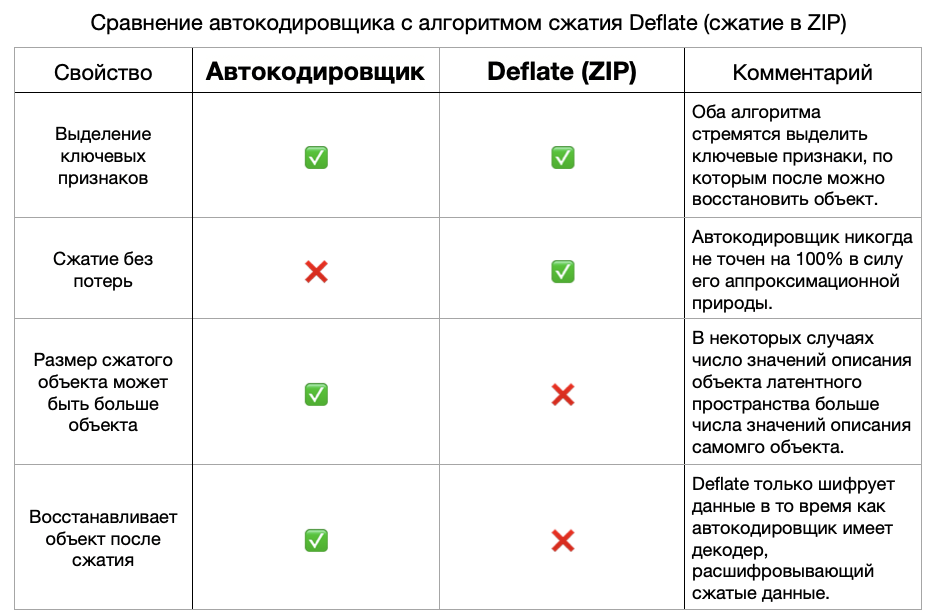

Главный смысл этого сравнения в том, что автокодировщик сжимает данные аналогично архиваторам. И происходит это за счет выделения ключевых признаков, по которым можно восстановить данные.

Хоть мы и провели сравнение архиваторов и автокодировщиков, не следует считать их взаимозаменяемыми! Они выполняют разные задачи.

Рассмотрим один из самых частых применений автокодировщиков – поиск выбросов. 

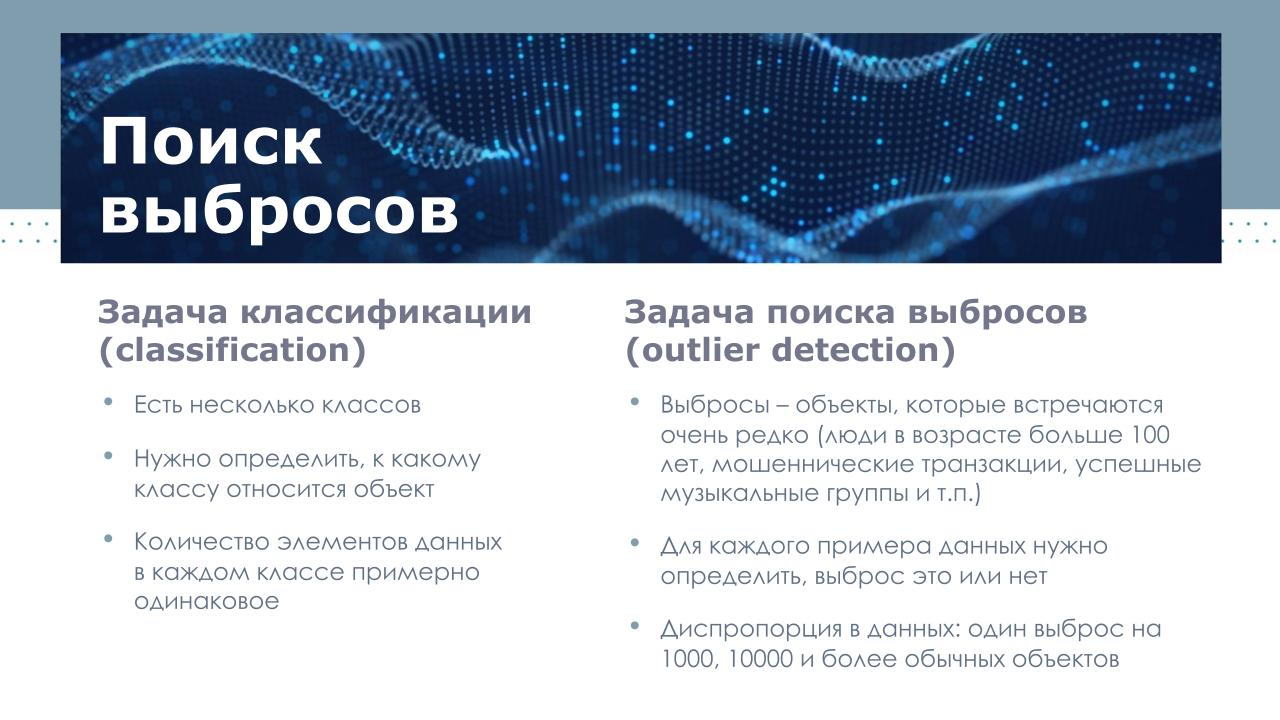

Сравните идею использования автокодировщика для поиска выбросов с задачами классификации. В последних у вас есть несколько классов, например 10 при классификации MNIST. И нужно определить, к какому классу относится данный объект. У задач классификации есть важное требование: объем данных в каждом классе должен быть примерно одинаковым.

Но как быть, если у вас сильный дисбаланс в объемах данных между классами? Например, нужно следить за показаниями датчиков на АЭС чтобы понять, когда станция нестабильно работает. Вы можете собрать десятки тысяч данных с датчиков о том, что станция работает успешно, и единицы о том, что есть какие-то неполадки. Если подходить к решению задачи при помощи классификации, то у вас будет два класса с огромным перекосом в первом классе (все в порядке). Поэтому этот метод будет плохо работать.

Если рассмотреть данные с датчиком о плохом состоянии АЭС, вы заметите, что они очень редки. 

Выбросы можно условно поделить на следующие типы: 
* **Точечные выбросы**. Единичные точки, выбивающиеся из общей картины. 
* **Контекстуальные выбросы**. Для того, чтобы определить, является ли точка выбросом, необходим контекст.
* **Коллективные выбросы**. Здесь выбросом является не точка, а группа точек. 

Примеры выбросов:
* Выпадение снега – контекстуальный выброс. То есть выброс это или нет, зависит от контекста. В пустыне Сахара, где снег выпадает раз в несколько лет, это выброс. А в городе Якутия, где снег выпадает около 200 дней в году, – уже не выброс.
* Мошеннические транзакции – точечные выбросы. На 1 000 обычных транзакций приходится около 2 мошеннеческих.
* Люди старше 110 лет на hh.ru – коллективный выброс. Очевидно, что чем старше люди, тем их меньше по количеству. На момент написания урока всего 33 соискателя возраста 100-109 лет. А возраст в промежутке 110-119 указали 50 соискателей, что по какой-то причине заметно больше, чем в предыдущем промежутке.

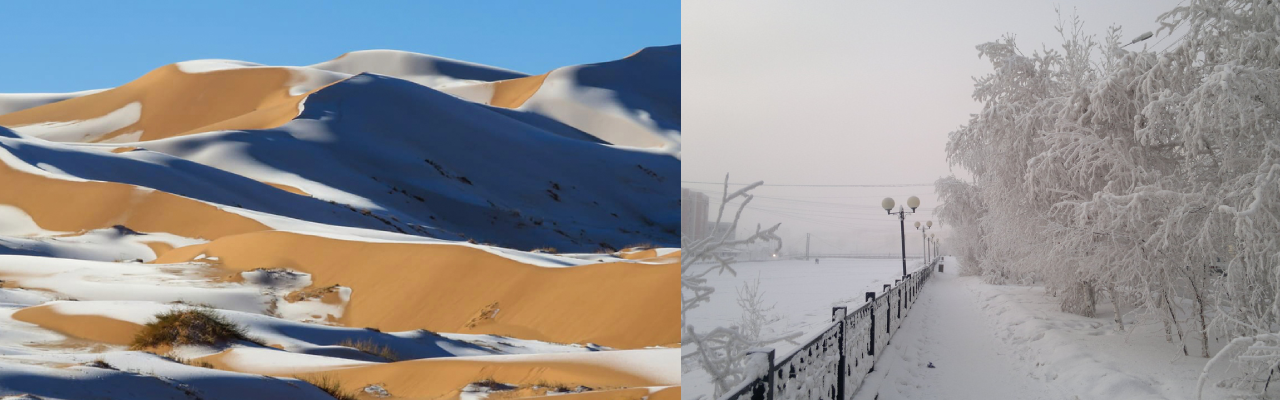

*Контекстуальный выброс. Снег в пустыне Сахара – выброс, а в Якутии – нет.*

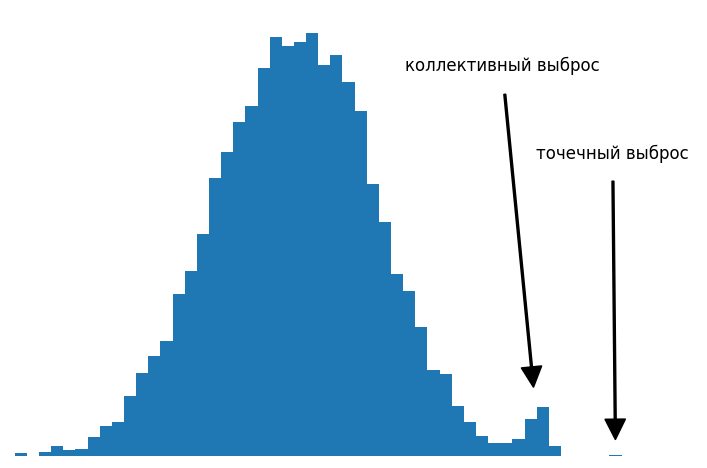

*Коллективный и точечный выбросы.* 


Суть задачи в том, чтобы рассмотреть каждый экземпляр и определить, выброс это или нет. Как вариант можно использовать бинарную классификацию. Однако с ней возникает серьезная проблема...

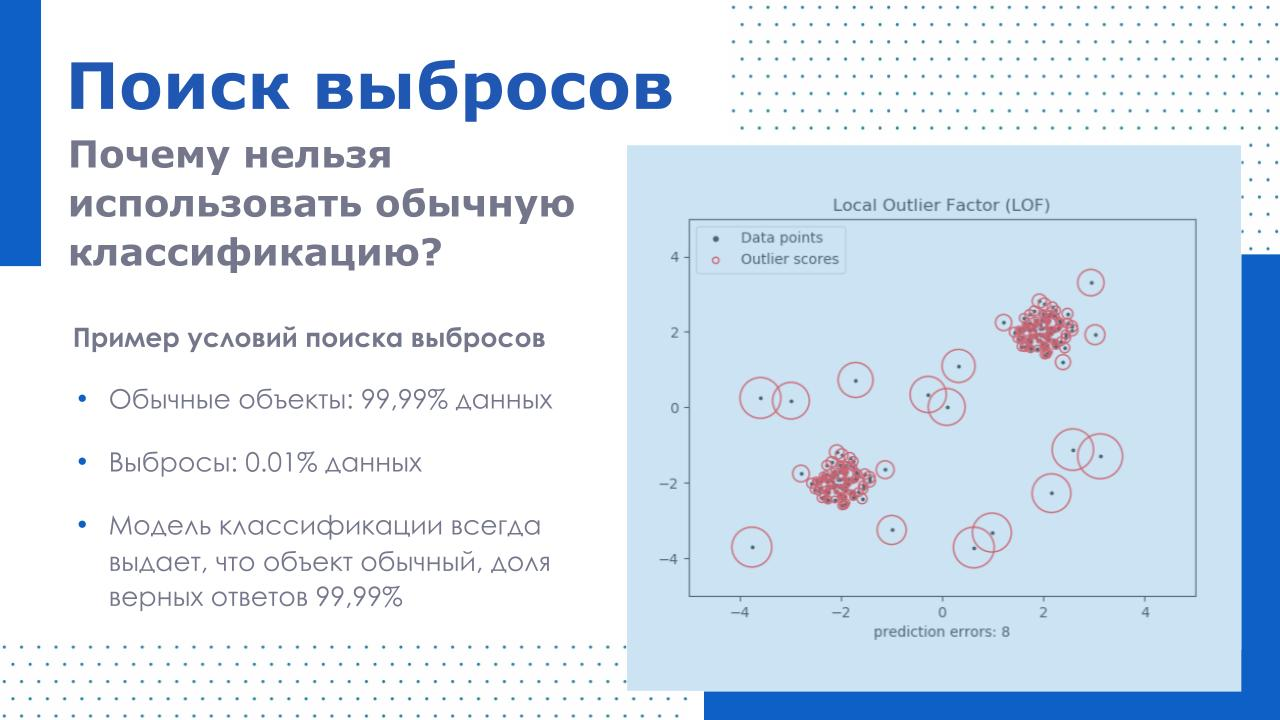

Рассмотрите пример, в котором у вас 10 000 данных в обучающей выборке. Из них 9 999 примеров первого класса и один пример второго класса. Создав НС, вот что вы получите на выходе. Если сеть будет всегда отвечать, что перед ней первый класс, то ее точность будет 99,99%. Идеально, не так ли? В другом случае это возможно, но вернитесь к примеру АЭС, на которой стоит такая нейросеть. Работа идет, и нейронка все время утверждает, что все хорошо. Возникает тот случай 1 на 10 000, и НС продолжает утверждать, что все хорошо. А в реальности это может обернуться новым Чернобылем. Поэтому в таких случаях нельзя использовать методику классификации.


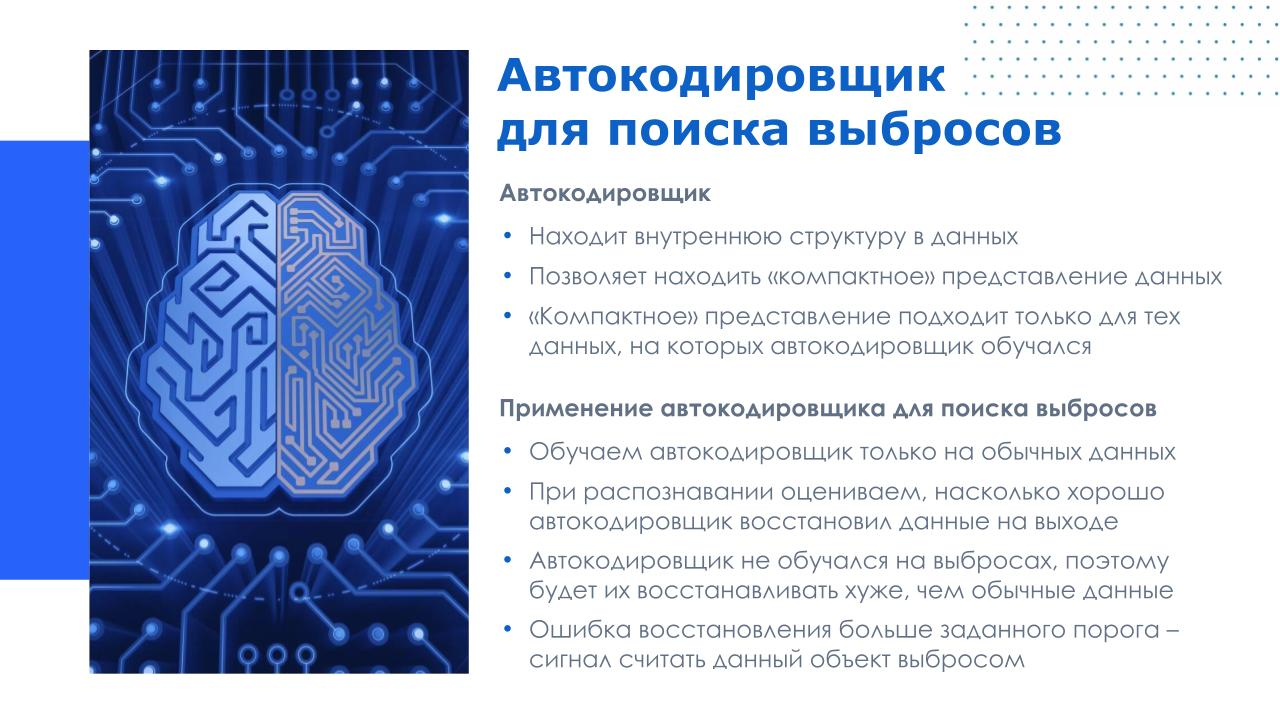

Применяя автокодировщики, вы решите эту проблему. В данном случае на входе и выходе будет не изображение, а данные, например с датчиков АЭС. Обучение будет происходить только на положительных данных. НС обнаружит структуру этих данных и затем будет их почти безошибочно определять. Если вы подадите отрицательные данные, обученная НС выдаст результат, отличный от первоначальных данных. Если вернуться к структуре НС, для определения выброса вам нужно всего лишь сравнить X и X', например ошибкой mse. При положительных данных ошибка будет минимальной, при отрицательных – будет расти.

**Автокодировщик для удаления шума.**

Существуют задачи удаления шума с изображения. Автокодировщик может подойти для такой задачи.
> Для удаления шума есть [много](https://link.springer.com/article/10.1007/s40747-021-00428-4) не менее интересных альтернатив. Однако прежде чем их изучать, советуем сначала пройти актуальную тему, так как многие из этих альтернатив работают похожим на автокодировщик образом.

Тут опять же не нужны размеченные данные. Точнее нужны, но мы их легко делаем сами. Мы просто берем оригинальные изображения и искусственно зашумляем их. Дальше обучаем модель, подавая на вход зашумленные изображения, а выход сравниваем с оригиналами.

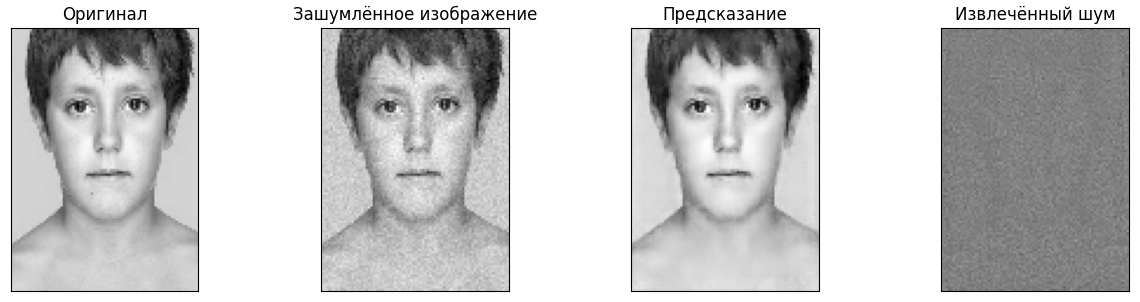

*Пример отчистки изображения от шумов автокодировщиком.
Эта задача будет рассмотрена во второй практике темы.*

**Автокодировщик для генерации новых данных**

Как вы уже знаете, если тренировочная выборка совпадает с целевой, то автокодировщик будет пытаться сжимать изображение в латентное пространство и восстанавливать из него оригинальное изображение. Но, будучи аппроксимационной функцией, автокодировщик не сможет восстановить картинку на 100% точно. Какие-то отклонения будут всегда.

И этим можно воспользоваться для генерации "новых" изображений.

Как это можно сделать?
Например, так:
1. Создаем автокодировщик
2. Обучаем восстанавливать тренировочные данные из них же
3. При достижении удовлетворительного результата – предсказания и оригиналы достаточно похожи – делаем предсказание по всей тренировочной выборке
4. Это предсказание добавляем к тренировочной выборке. Если у данных есть метки – например у картинок цифр есть метки каждой из этих цифр (3, 9, 7, ...) – добавляем эти метки.
5. Выборка расширена в 2 раза. Теперь эти данные можно использовать в следующей задаче. Например, обычная классификация картинок по классам.

**Способ расширения выборки через создание разных автокодировщиков.**

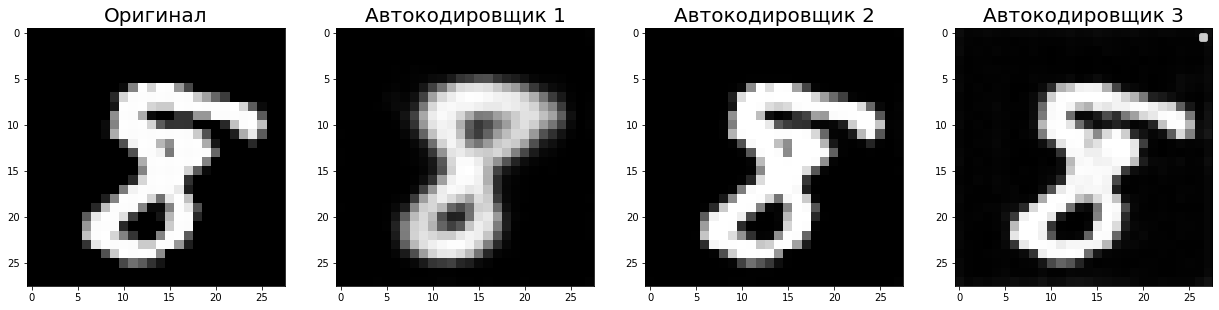

*Создание и обучение 3-х разных автокодировщиков позволяет расширить выборку в 4 раза.*

**Способ расширения выборки через предсказание автокодировщика каждую эпоху.**

Также можно получать "обработанный" автокодировщиком тренировочный датасет раз в эпоху обучения. Каждая последующая выборка в среднем будет ближе предыдущей к оригиналу. 

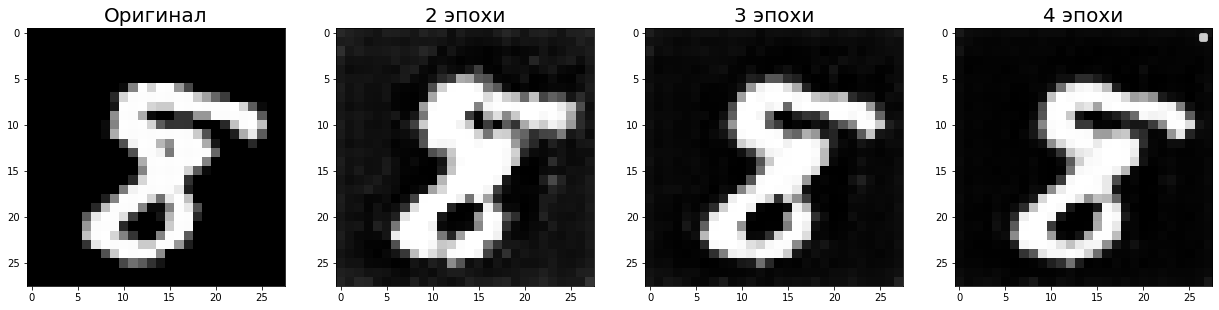

*Получаем новый датасет каждую эпоху обучения одного автокодировщика. На картинке увеличиваем выборку в 4 раза.* 

**Способ расширения выборки через рекурсивное предсказание.**

Также можно получать новый датасет, прогоняя предыдущее предсказание через модель снова. То есть пусть модель называется `ae`, тренировочная выборка – `X_train`. Тогда предсказание будет `pred = ae(X_train)`. Новая выборка – `pred`. Еще одну выборку получим так: `pred_2 = ae(pred)`. И так далее.

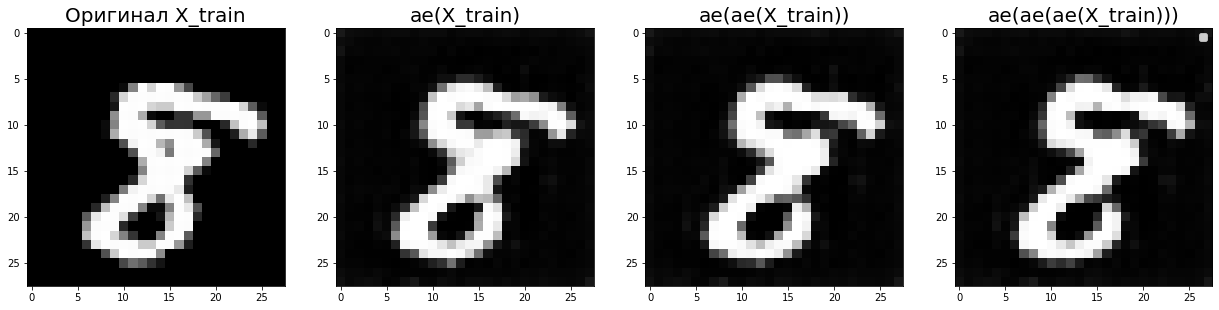

*Получаем каждую выборку из предсказания предыдущей. На картинке увеличиваем выборку в 4 раза.*

Как видим, с автокодировщиками нам открываются невероятные возможности по расширению датасета. На сколько это эффективно, можете проверить сами в последующих задачах.

**Содержание темы**

1. Теория

2. [Практика 1](https://colab.research.google.com/drive/1dApswu6lfXEWfPl9ZgTspfFIneWGQIOq?usp=sharing)

3. [Практика 2](https://colab.research.google.com/drive/1sLGgmGkPLr5-ZLJM6vNLs7rQH29rbSUZ?usp=sharing)
